22H1120016 - Trần Đăng Nam

Lab 3.3 Thử nghiệm nhiều bộ phân loại trên Dataset Digits 

Mục tiêu: So sánh hiệu năng (độ chính xác) của 10 classifiers trên dataset Digits và xác định mô hình tốt nhất (Accuracy cao nhất).


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 10 classificaion models 
from sklearn.neighbors import KNeighborsClassifier                          # Cây gần nhất - KNN
from sklearn.svm import SVC                                                 # Support Vector Machine 
from sklearn.gaussian_process import GaussianProcessClassifier              # Classification thuộc Gaussian Process
from sklearn.gaussian_process.kernels import RBF                            # Kernel cho Gaussian Process
from sklearn.tree import DecisionTreeClassifier                             # Cây quyết định


from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier     # Import các Classification thuộc Ensemble          ---      (Random Forest, AdaBoost)
from sklearn.neural_network import MLPClassifier                            # Nhập bộ phân loại Neural Network (Multi-layer Perceptron)
from sklearn.naive_bayes import GaussianNB                                  # Classification Naive Bayes (Gaussian)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis     # Import các Classification thuộc Discriminant      ---      Quadratic Discriminant Analysis


import warnings
warnings.filterwarnings('ignore') # Tắt bớt cảnh báo (ví dụ: convergence)


In [11]:
digits = datasets.load_digits()

# 1. Chuẩn bị dữ liệu
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # Làm phẳng ảnh

X = data
y = digits.target


X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 2. Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)


In [17]:
classifiers = {
    "Nearest Neighbors (k=3)": KNeighborsClassifier(3),

    "Linear SVM": SVC(kernel="linear", C=0.025, random_state=42), # C thấp để giống ví dụ
    
    "RBF SVM": SVC(gamma=2, C=1, random_state=42), # Gamma và C như ví dụ
    
    
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42), # Giới hạn độ sâu để tránh overfitting
    
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=100, max_features=8, random_state=42), # n_estimators tăng, max_features=sqrt(64)
    
    "Neural Net (MLP)": MLPClassifier(alpha=1, max_iter=1000, random_state=42), # Tăng max_iter
    
    "AdaBoost": AdaBoostClassifier(random_state=42),
    
    "QDA": QuadraticDiscriminantAnalysis(reg_param=0.0001), # Thêm reg_param

    "Naive Bayes": GaussianNB(),

    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42), # Gaussian Process với kernel RBF -> train lâu hơn rất rất nhiều do O(n^3)

}



classifier_names = list(classifiers.keys())

In [29]:
# 3. Huấn luyện, dự đoán và đánh giá
results = {}
best_classifier_name = ""
best_accuracy = 0.0
best_model = None

for name, clf in classifiers.items():
    start_time = time.time()
    print(f"Đang huấn luyện: {name}...")

    # Traing (có refit)
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    end_time = time.time()
    duration = end_time - start_time
    print(f"  -> Hoàn thành trong {duration:.2f} giây. Độ chính xác: {accuracy:.4f}")

    # Cập nhật mô hình tốt nhất
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier_name = name
        best_model = clf # Lấy model xịn nhất

Đang huấn luyện: Nearest Neighbors (k=3)...
  -> Hoàn thành trong 0.01 giây. Độ chính xác: 0.9667
Đang huấn luyện: Linear SVM...
  -> Hoàn thành trong 0.03 giây. Độ chính xác: 0.9844
Đang huấn luyện: RBF SVM...
  -> Hoàn thành trong 0.18 giây. Độ chính xác: 0.1022
Đang huấn luyện: Decision Tree...
  -> Hoàn thành trong 0.01 giây. Độ chính xác: 0.6667
Đang huấn luyện: Random Forest...
  -> Hoàn thành trong 0.18 giây. Độ chính xác: 0.9222
Đang huấn luyện: Neural Net (MLP)...
  -> Hoàn thành trong 1.32 giây. Độ chính xác: 0.9822
Đang huấn luyện: AdaBoost...
  -> Hoàn thành trong 0.15 giây. Độ chính xác: 0.7467
Đang huấn luyện: QDA...
  -> Hoàn thành trong 0.03 giây. Độ chính xác: 0.9556
Đang huấn luyện: Naive Bayes...
  -> Hoàn thành trong 0.00 giây. Độ chính xác: 0.7644
Đang huấn luyện: Gaussian Process...
  -> Hoàn thành trong 270.60 giây. Độ chính xác: 0.9778


In [30]:
# 4. Xác định và báo cáo bộ phân loại tốt nhất
print("\n--- Kết quả ---")
print(f"Bộ phân loại có độ chính xác cao nhất là: '{best_classifier_name}'")
print(f"Độ chính xác trên tập kiểm tra: {best_accuracy:.4f}")

# In kết quả của tất cả các bộ phân loại (sắp xếp theo độ chính xác)
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
print("\nĐộ chính xác của các bộ phân loại (cao đến thấp):")
for name, acc in sorted_results.items():
    print(f"- {name}: {acc:.4f}")


--- Kết quả ---
Bộ phân loại có độ chính xác cao nhất là: 'Linear SVM'
Độ chính xác trên tập kiểm tra: 0.9844

Độ chính xác của các bộ phân loại (cao đến thấp):
- Linear SVM: 0.9844
- Neural Net (MLP): 0.9822
- Gaussian Process: 0.9778
- Nearest Neighbors (k=3): 0.9667
- QDA: 0.9556
- Random Forest: 0.9222
- Naive Bayes: 0.7644
- AdaBoost: 0.7467
- Decision Tree: 0.6667
- RBF SVM: 0.1022


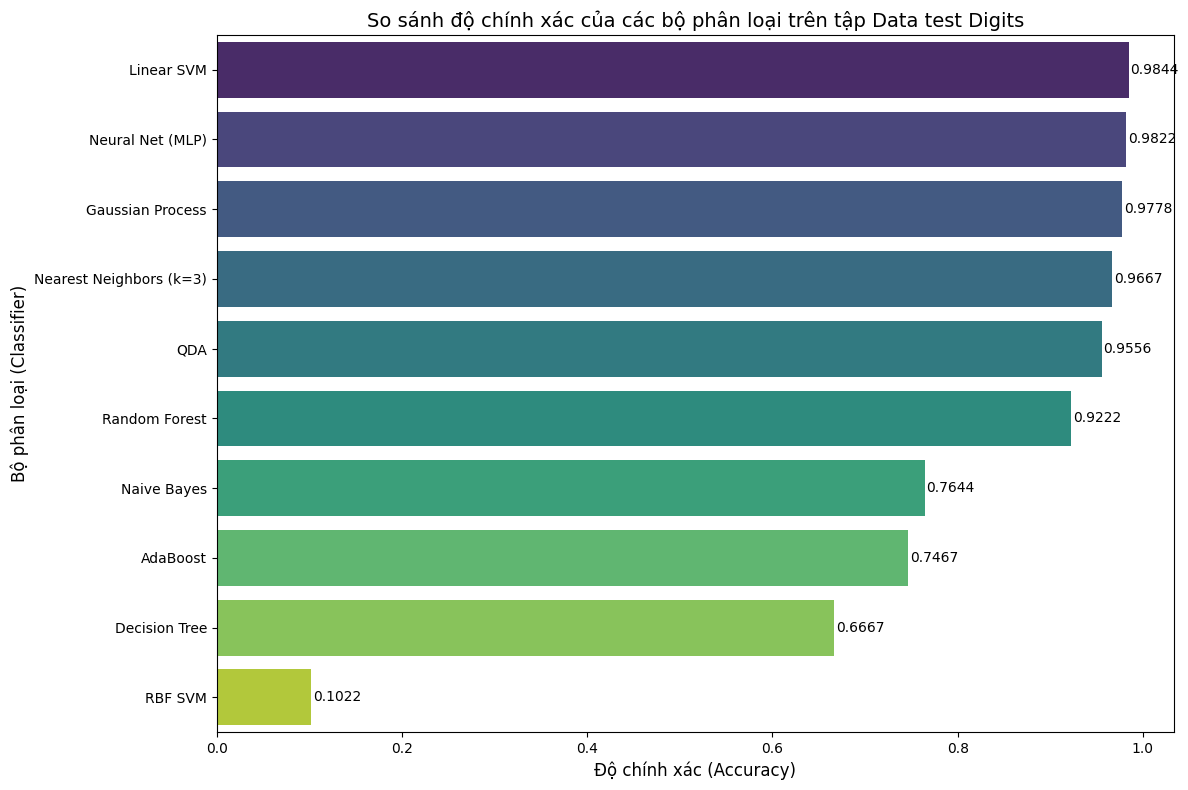

In [31]:
# 5. Visuualize accuracy của từng classiifier trên tập test

plt.figure(figsize=(12, 8)) 

sns.barplot(x=list(sorted_results.values()), y=list(sorted_results.keys()), palette="viridis")
plt.xlabel('Độ chính xác (Accuracy)', fontsize=12) 
plt.ylabel('Bộ phân loại (Classifier)', fontsize=12) 
plt.title('So sánh độ chính xác của các bộ phân loại trên tập Data test Digits', fontsize=14)


for index, value in enumerate(sorted_results.values()):
    # Giữ nguyên hoặc điều chỉnh nhẹ vị trí text nếu cần sau khi thay đổi figsize
    plt.text(value + 0.002, index, f"{value:.4f}", va='center', fontsize=10)

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

plt.tight_layout() # auto điều chỉnh độ cao
plt.show()


Trực quan hóa Confusion Matrix cho bộ phân loại tốt nhất: Linear SVM


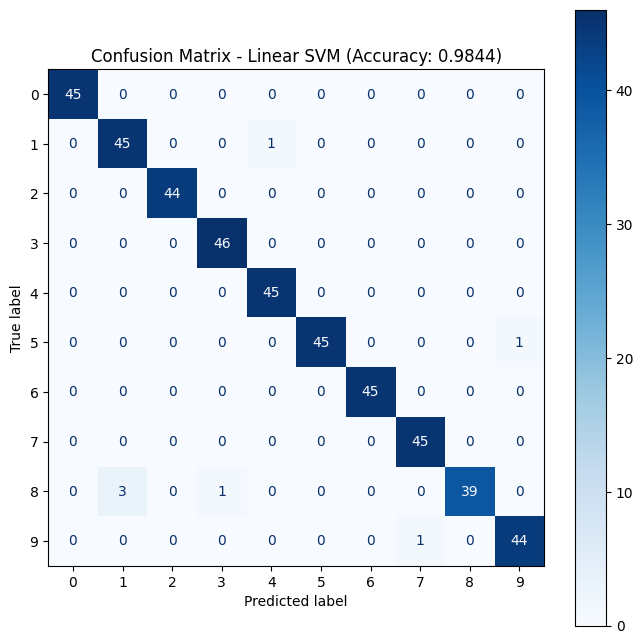

In [32]:
# 6. Confusing matrix for the best classifier

if best_model is not None:
    print(f"\nTrực quan hóa Confusion Matrix cho bộ phân loại tốt nhất: {best_classifier_name}")
    # Dự đoán lại trên tập test bằng mô hình tốt nhất (để chắc chắn)
    y_pred_best = best_model.predict(X_test)
    cm_best = confusion_matrix(y_test, y_pred_best)

    # Vẽ confusion matrix
    disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=digits.target_names)
    fig, ax = plt.subplots(figsize=(8, 8))
    disp_best.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(f'Confusion Matrix - {best_classifier_name} (Accuracy: {best_accuracy:.4f})')
    plt.show()
else:
    print("Không tìm thấy mô hình tốt nhất để vẽ Confusion Matrix.")